# Self-Driving Car Engineer Nanodegree

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Import packages

In [1]:
# serialization
import pickle

# math
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline

# system stuff
import os

# ML stuff
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.contrib.layers import flatten

---
## Step 0: Load The German Traffic Sign Data

In [2]:
# where is the data pickled?
training_file = 'DATA/train.p'
validation_file= 'DATA/valid.p'
testing_file = 'DATA/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(np.unique(y_train)) & set(np.unique(y_valid)) & set(np.unique(y_test)))

# print summary data
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Read in the sign names

In [4]:
# file containing sign names
sign_names_file = 'signnames.csv'

# read sign names
if os.path.exists(sign_names_file):
    with open(sign_names_file,'r') as sf:
        df_signs = pd.read_csv(sf).set_index('ClassId')
else:
    print("Cannot find sign names file")
    raise

#### What do some typical images look like?

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


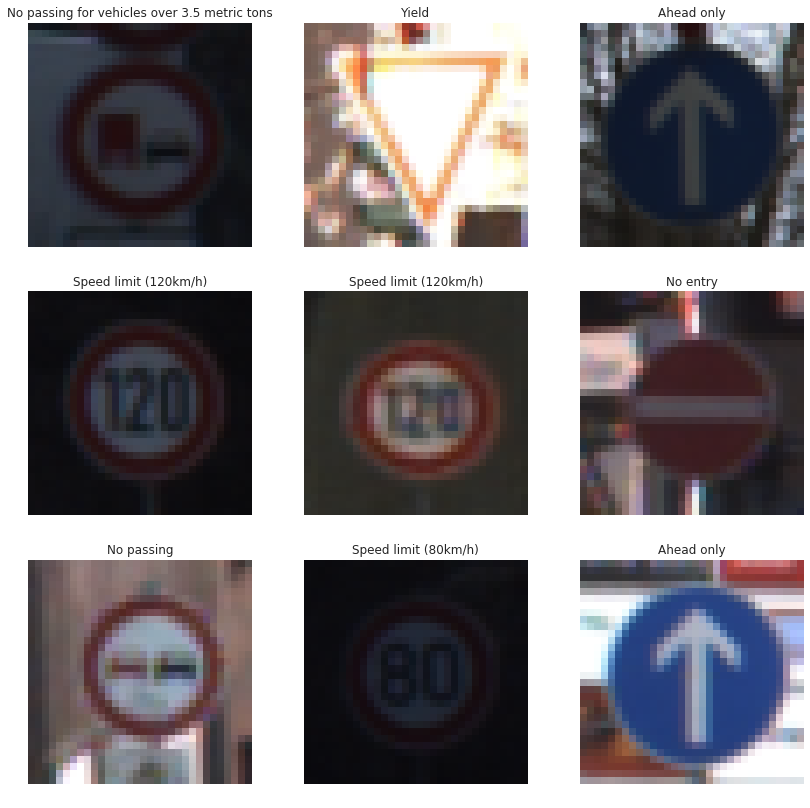

In [5]:
# create figure with random images
fig_rand, ax_rand = plt.subplots(3,3)

# adjust size
fig_rand.set_figheight(14)
fig_rand.set_figwidth(14)

for ax in ax_rand.flatten():
    
    # select random index of training dataset
    this_ind = np.random.choice(n_train)
    
    # get training image
    this_img = X_train[this_ind,:,:,:]
    
    # plot it
    ax.imshow(this_img)
    ax.grid('off')
    ax.axis('off')
    
    # add label
    this_label = y_train[this_ind]
    ax.set_title(df_signs.loc[this_label,'SignName'])
    
fig_rand.savefig('VIZ/examples')

#### Separately, make an exhaustive plot of all signs, for later reference

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


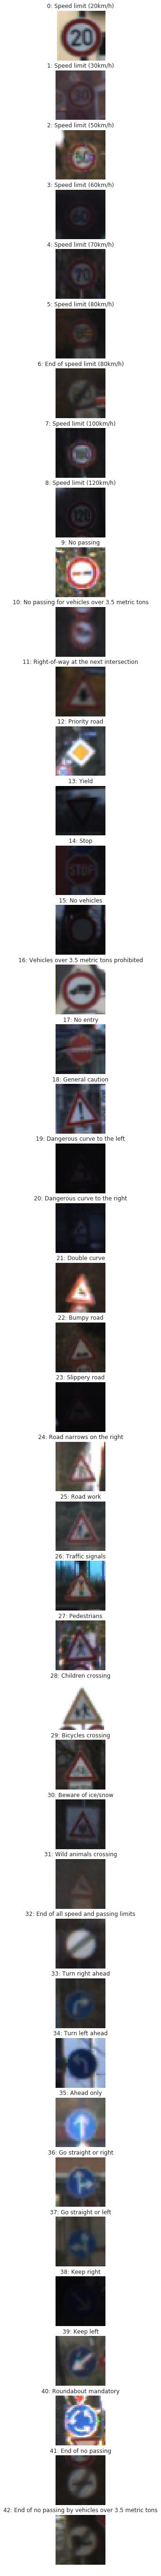

In [6]:
# display all the images
fig_all, ax_all = plt.subplots(43,1)

# adjust size
fig_all.set_figheight(100)
fig_all.set_figwidth(16)

# cycle through axes
for i, ax in enumerate(ax_all.flatten()):
        
    # find the first example of i
    this_ind = np.argwhere(y_train == i)[0][0]

    # this img
    this_img = X_train[this_ind,:,:,:]

    # plot it
    ax.imshow(this_img)
    ax.grid('off')
    ax.axis('off')
    ax.set_aspect('equal')

    # add label
    this_label = y_train[this_ind]
    ax.set_title(str(this_label) + ': ' + df_signs.loc[this_label,'SignName'])
    

#### And how balanced are the images across classes? Across train/validation/test?

In [6]:
# gather all labels
all_labels = np.concatenate([y_train, y_valid, y_test])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


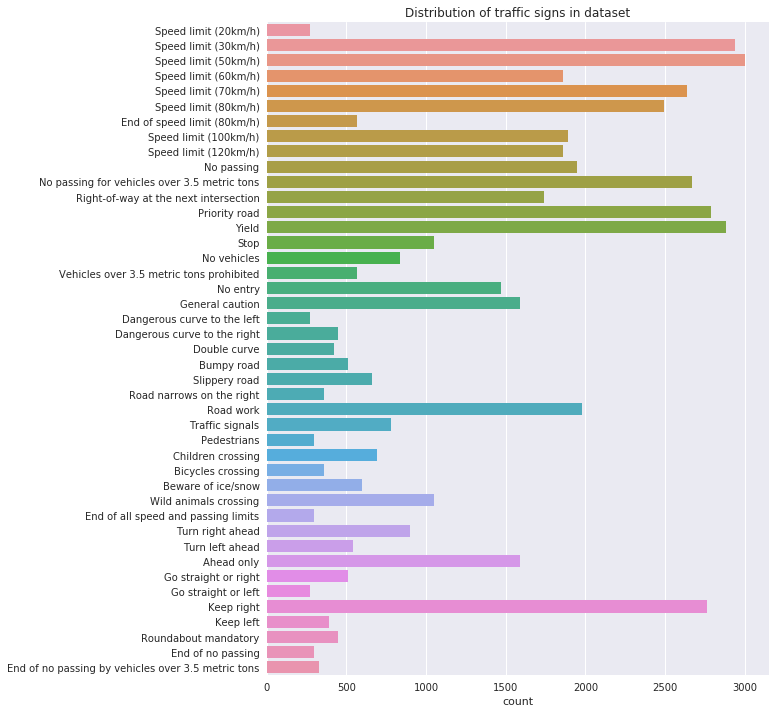

In [7]:
sns.set_style('darkgrid')

# plot the label distribution
g = sns.countplot(y=all_labels)

# get figure handles
f_lab = g.figure
ax_lab = g

# adjust size
f_lab.set_figheight(12)
f_lab.set_figwidth(9)

# title & y-axis
#ax_lab.set_ylabel('')
ax_lab.set_yticklabels(df_signs.SignName);
ax_lab.set_title('Distribution of traffic signs in dataset')


f_lab.savefig('VIZ/distribution')

Perhaps unsurprisingly, the dataset is very imbalanced just like signs in the road on everyday life are imbalanced.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
# shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=33)

In [9]:
def simple_normalizer(arr):
    """ A simple normalizer"""
    return (arr-128)/128

def rgb2gray(rgb):
    """ Converts an rgb image to grayscale"""
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def pre_process(X_star):
    """ Wrapper for image pre-processing"""
    gray = rgb2gray(X_star)
    gray = gray.reshape(gray.shape + (1,))
    
    normed = simple_normalizer(gray)
    return normed

# collect pre-processed data
Xp_train = pre_process(X_train)
Xp_valid = pre_process(X_valid)
Xp_test = pre_process(X_test)

In [16]:
np.reshape(im_before, (1,32,32,3))

array([[[[ 90, 105, 123],
         [102, 109, 130],
         [104, 102, 115],
         ..., 
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 73,  88, 112],
         [ 88,  95, 125],
         [102, 104, 120],
         ..., 
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 55,  70,  87],
         [ 70,  80,  95],
         [ 83,  87,  94],
         ..., 
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ..., 
        [[ 42,  46,  48],
         [ 44,  44,  48],
         [ 58,  55,  59],
         ..., 
         [186, 178, 151],
         [158, 155, 138],
         [143, 125, 118]],

        [[ 40,  45,  48],
         [ 43,  44,  49],
         [ 57,  53,  59],
         ..., 
         [162, 152, 141],
         [154, 152, 149],
         [135, 133, 137]],

        [[ 43,  45,  49],
         [ 44,  43,  49],
         [ 55,  51,  59],
         ..., 
         [154, 148, 154],
  

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


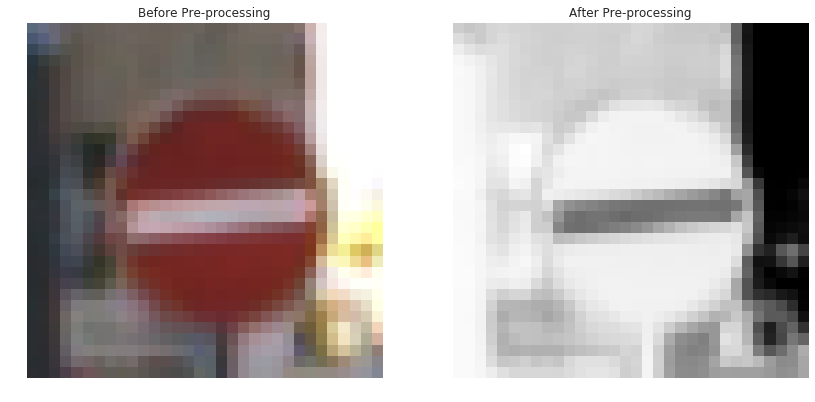

In [23]:
# lets generate a before and after plot to get intuition about pre-processing

fig_ba, ax_ba = plt.subplots(1,2)

fig_ba.set_figwidth(14)
fig_ba.set_figheight(10)

# pick an image
im_before = X_train[400,:,:,:]

# preprocess it
im_after = pre_process(im_before)

# plot both before and after
ax_ba[0].imshow(im_before)
ax_ba[1].imshow(np.reshape(im_after, (32,32)))

# label it
ax_ba[0].set_title('Before Pre-processing')
ax_ba[1].set_title('After Pre-processing')

# clean axes
for ax in ax_ba:
    ax.grid('off')
    ax.axis('off')
    
fig_ba.savefig('VIZ/before_after')

### Model Architecture

In [11]:
EPOCHS = 15
BATCH_SIZE = 64

In [12]:
def TrafficNet(x):
    """ 
    A custom architecture for Deep Learning that classifies German Traffic Signs
    
    --- Input  --- 
    :x: 32x32x1 grayscale image
    
    --- Output ---
    :logits: An array of logits n_classes long
    
    
    """
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 1: Activation.
    conv1_relu = tf.nn.relu(conv1)

    # Layer 1: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1_pool = tf.nn.max_pool(conv1_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1_pool, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Layer 2: Activation.
    conv2_relu = tf.nn.relu(conv2)

    # Layer 2: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2_pool = tf.nn.max_pool(conv2_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2_pool)
    
    # Layer 3: Fully Connected. Input = 400. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Layer 3: Activation.
    fc1_relu = tf.nn.relu(fc1)
    
    # Layer 3: Dropout
    fc1_dropout = tf.nn.dropout(fc1_relu, keep_prob=keeper_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1_dropout, fc2_W) + fc2_b
    
    # Layer 4: Activation.
    fc2_relu    = tf.nn.relu(fc2)
    
    # Layer 4: Dropout
    fc2_dropout   = tf.nn.dropout(fc2_relu, keep_prob=keeper_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2_dropout, fc3_W) + fc3_b

    # return the array of logits
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
# define x and y, the placeholders for input and output
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keeper_prob = tf.placeholder(tf.float32)

# one hot encode them
one_hot_y = tf.one_hot(y, n_classes)

In [14]:
# learning rate
rate = 0.001

In [15]:
# build training pipeline
logits = TrafficNet(x)
# calcualte element-wise error
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# avergage error
loss_operation = tf.reduce_mean(cross_entropy)
# specify how to reduce it
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# apply algo
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
saver = tf.train.Saver()

In [18]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keeper_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
# start tensorflow session for training
with tf.Session() as sess:
    
    # set the random seed
    tf.set_random_seed(33)
    
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # how many training examples do we have
    num_examples = len(Xp_train)
    
    print("Training TrafficNet...")
    
    # loop over epochs
    for i in range(EPOCHS):
        # reshuffle the dataset
        Xp_train, y_train = shuffle(Xp_train, y_train)
        
        # loop over batches of the data
        for offset in range(0, num_examples, BATCH_SIZE):
            # calculate indices of this batch
            ind_end = offset + BATCH_SIZE
            batch_x, batch_y = Xp_train[offset:ind_end], y_train[offset:ind_end]
            
            # execute the graph
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keeper_prob: 0.5})
            
        training_accuracy = evaluate(Xp_train, y_train)
        validation_accuracy = evaluate(Xp_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficnet')
    print("Model saved")
    

Training TrafficNet...
EPOCH 1 ...
Training Accuracy = 0.760
Validation Accuracy = 0.722

EPOCH 2 ...
Training Accuracy = 0.895
Validation Accuracy = 0.846

EPOCH 3 ...
Training Accuracy = 0.941
Validation Accuracy = 0.889

EPOCH 4 ...
Training Accuracy = 0.957
Validation Accuracy = 0.910

EPOCH 5 ...
Training Accuracy = 0.973
Validation Accuracy = 0.928

EPOCH 6 ...
Training Accuracy = 0.980
Validation Accuracy = 0.934

EPOCH 7 ...
Training Accuracy = 0.982
Validation Accuracy = 0.937

EPOCH 8 ...
Training Accuracy = 0.987
Validation Accuracy = 0.946

EPOCH 9 ...
Training Accuracy = 0.987
Validation Accuracy = 0.943

EPOCH 10 ...
Training Accuracy = 0.991
Validation Accuracy = 0.943

EPOCH 11 ...
Training Accuracy = 0.992
Validation Accuracy = 0.950

EPOCH 12 ...
Training Accuracy = 0.993
Validation Accuracy = 0.956

EPOCH 13 ...
Training Accuracy = 0.994
Validation Accuracy = 0.955

EPOCH 14 ...
Training Accuracy = 0.994
Validation Accuracy = 0.954

EPOCH 15 ...
Training Accuracy = 0

### Now let's evaluate the model on the test data

In [20]:
# evaluate out of sample accuracy
with tf.Session() as sess:    
    
    #saver = tf.train.import_meta_graph('./trafficnet')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    test_acc = evaluate(Xp_test, y_test)
    print("Test Accuracy = {:0.1f}%".format(test_acc*100.0))
    

Test Accuracy = 93.0%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
### Load the images and plot them here.
from glob import glob
from scipy.misc import imread
from scipy.misc import imresize

# find the images downloaded from Google images
imgs_glob = glob('DATA/online_examples/*.jpg')
# load them into np arrays
online_ims = [imread(ig) for ig in imgs_glob]
# resize to be 32x32x3
resized_ims = [imresize(im, (32,32,3)) for im in online_ims]

In [22]:
# labels for images downloaded from internet
im_labels = [28,25, 23, 31, 13]

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


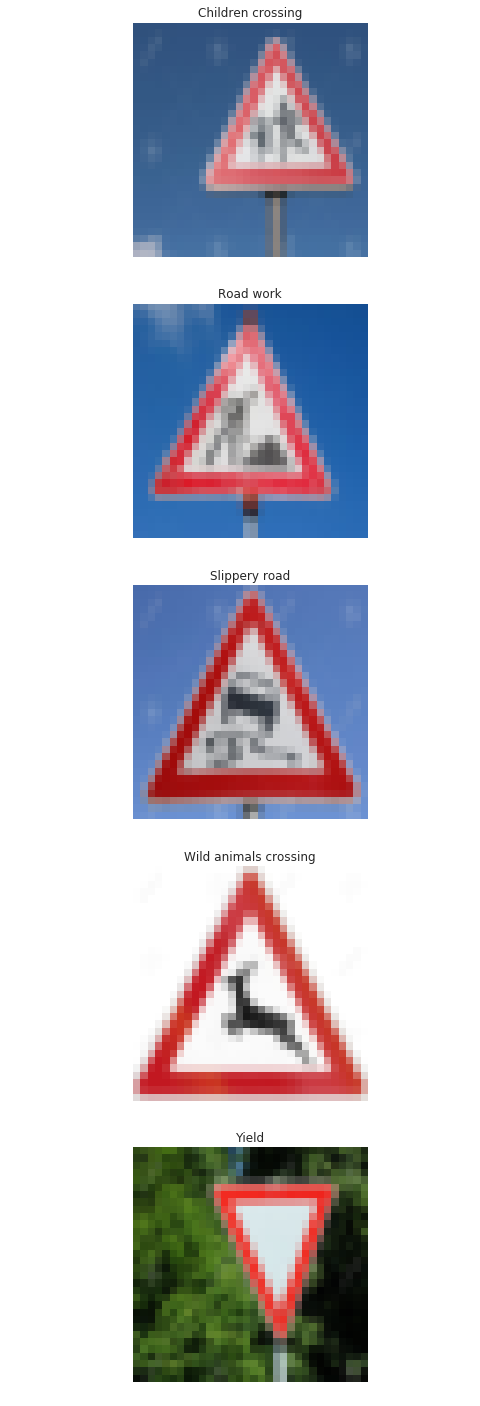

In [23]:
# now display them
f_im, ax_im = plt.subplots(5,1)

# size the image
f_im.set_figwidth(8)
f_im.set_figheight(25)

# enumerate images
for ii, im in enumerate(resized_ims):
    ax = ax_im.ravel()[ii]
    ax.imshow(im)
    ax.grid('off')
    ax.axis('off')
    ax.axis('equal')
    ax.set_title(df_signs.loc[df_signs.index == im_labels[ii], 'SignName'].values[0])


### Predict the Sign Type for Each Image

In [29]:
# now run the network on these new images
with tf.Session() as sess:    
    #saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    # get logits from images
    im_logits = [
        sess.run(
            logits, feed_dict={
                x: np.reshape(pre_process(im),[1,32,32,1]), 
                keeper_prob: 1.0
            }
        ) for im in resized_ims]
    
    #     sess.run(3)
    
    #     im_logits = [sess.run(logits, feed_dict={x: np.reshape(pre_process(im),[1,32,32,1])}) for im in resized_ims]
    labs = [np.argmax(logi,1)[0] for logi in im_logits]
    preds = [df_signs.loc[lab,'SignName'] for lab in labs]


In [38]:
print('Here are the out of sample predictions')
preds

Here are the out of sample predictions


['Traffic signals',
 'Wild animals crossing',
 'Slippery road',
 'Wild animals crossing',
 'Speed limit (80km/h)']

Ok so I got 2/5 right... :-/

### Analyze Performance

In [39]:
print('Out of sample accuracy: {:.1f}%'.format(100.0*sum(map(lambda tup: tup[0] == tup[1],zip(im_labels, labs)))/5))
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Out of sample accuracy: 40.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [70]:
def softmax_probs(arr_logits):
    #     for logit in arr_logits:
    my_sum = np.sum(np.exp(logit) for logit in arr_logits)
    return [np.exp(logit)/my_sum for logit in arr_logits]


lst_top_fives = []
lst_top_probs = []

# cycle through logits for each class
for logi in im_logits:
    
    # convert to 1d array
    logi = np.reshape(logi,-1)
    
    # calculate softmax probabilities
    probs = softmax_probs(logi)
    
    
    
    # what are the top 5 suggested classes
    ranked_probs = sorted(zip(range(n_classes),probs), key=lambda tup: tup[1], reverse=True)[:3]
    
    # save these
    lst_top_fives.append(ranked_probs)
    
# print out hte most likely 3 for each of the 5 images
print('Here are the most likely labels (descending order left to right) along with their softmax prob: \n')
for im in lst_top_fives:
    
    print(im)

Here are the most likely labels (descending order left to right) along with their softmax prob: 

[(26, 0.67885998653988455), (18, 0.14113765896995817), (22, 0.069723641255365107)]
[(31, 0.42195205030051608), (21, 0.31109248981889737), (30, 0.15107196865266326)]
[(23, 0.92964999777079382), (19, 0.050612519154375479), (30, 0.019115359727179475)]
[(31, 0.90334617675678253), (25, 0.096653822210460455), (10, 4.4570435880620178e-10)]
[(5, 0.7018424737225869), (1, 0.12690924925884581), (2, 0.075421412443353458)]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")